# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
### Import relevant libraries

import pickle
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
### Load pickled data

training_file = './traffic_signs_data/train.p'
validation_file = './traffic_signs_data/valid.p'
testing_file = './traffic_signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Loaded pickled data.')

Loaded pickled data.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Support functions

def read_sign_names(filename):
    ''' 
    Reads sign names from a CSV files and stores the names in a dictionary.
    
    'filename'   Filename of CSV file.
    
    Returns an array with sign names. The index in the array corresponds to the ClassId.
    '''
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile)
        
        signnames = []
        
        for row in reader:
            signnames.append(row['SignName'])
    
    return signnames

In [4]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Number of validation examples.
n_valid = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# How many unique classes/labels there are in the dataset.
signnames = read_sign_names('signnames.csv')
n_classes = len(signnames)

# Total number of samples
total = n_train + n_valid + n_test

print("Image data shape:   {}".format(image_shape))
print("Number of classes:  {}".format(n_classes))
print()
print("Training samples:   {0:5} | {1:5.2f}%".format(n_train, n_train / total * 100))
print("Validation samples: {0:5} | {1:5.2f}%".format(n_valid, n_valid / total * 100))
print("Test samples:       {0:5} | {1:5.2f}%".format(n_test, n_test / total * 100))

Image data shape:   (32, 32, 3)
Number of classes:  43

Training samples:   34799 | 67.13%
Validation samples:  4410 |  8.51%
Test samples:       12630 | 24.36%


In [5]:
### Show a list of ClassId and SignName

print(' ClassId | Signname')
print('---------+------------------------------------------------')

for i in range(0, len(signnames)):
    print('{0:8d} | {1}'.format(i, signnames[i]))

 ClassId | Signname
---------+------------------------------------------------
       0 | Speed limit (20km/h)
       1 | Speed limit (30km/h)
       2 | Speed limit (50km/h)
       3 | Speed limit (60km/h)
       4 | Speed limit (70km/h)
       5 | Speed limit (80km/h)
       6 | End of speed limit (80km/h)
       7 | Speed limit (100km/h)
       8 | Speed limit (120km/h)
       9 | No passing
      10 | No passing for vehicles over 3.5 metric tons
      11 | Right-of-way at the next intersection
      12 | Priority road
      13 | Yield
      14 | Stop
      15 | No vehicles
      16 | Vehicles over 3.5 metric tons prohibited
      17 | No entry
      18 | General caution
      19 | Dangerous curve to the left
      20 | Dangerous curve to the right
      21 | Double curve
      22 | Bumpy road
      23 | Slippery road
      24 | Road narrows on the right
      25 | Road work
      26 | Traffic signals
      27 | Pedestrians
      28 | Children crossing
      29 | Bicycles crossing
 

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

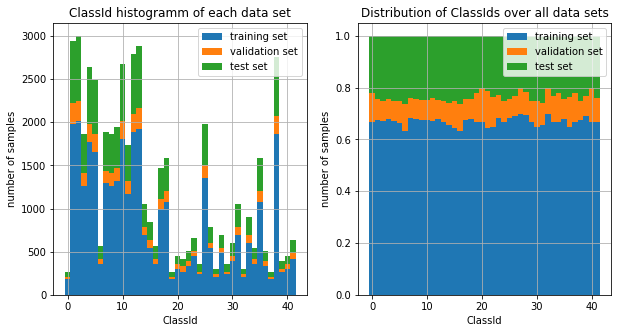

In [6]:
### Show histogram of sign classes for training, validation and test sets

bins = np.arange(0, n_classes, 1)
hist_train, bin_edges = np.histogram(y_train, bins=bins)
hist_valid, bin_edges = np.histogram(y_valid, bins=bins)
hist_test, bin_edges = np.histogram(y_test, bins=bins)

hist_total = hist_train + hist_valid + hist_test
hist_train_proportion = hist_train / hist_total
hist_valid_proportion = hist_valid / hist_total
hist_test_proportion = hist_test / hist_total

# plot sign class distributions
width = 1.0           # bar width
center = (bins[:-1] + bins[1:]) / 2 - 0.5

# Plot ClassId histogram of all data sets
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(center, hist_train, width, label='training set')
plt.bar(center, hist_valid, width, bottom=hist_train, label='validation set')
plt.bar(center, hist_test, width, bottom=hist_train+hist_valid, label='test set')
plt.title('ClassId histogramm of each data set')
plt.xlabel('ClassId')
plt.ylabel('number of samples')
plt.grid()
plt.legend()

# Plot disctribution of single ClassId over all data sets
plt.subplot(122)
plt.bar(center, hist_train_proportion, width, label='training set')
plt.bar(center, hist_valid_proportion, width, bottom=hist_train_proportion, label='validation set')
plt.bar(center, hist_test_proportion, width, bottom=hist_train_proportion + hist_valid_proportion, label='test set')
plt.title('Distribution of ClassIds over all data sets')
plt.xlabel('ClassId')
plt.ylabel('number of samples')
plt.grid()
plt.legend()
plt.show()

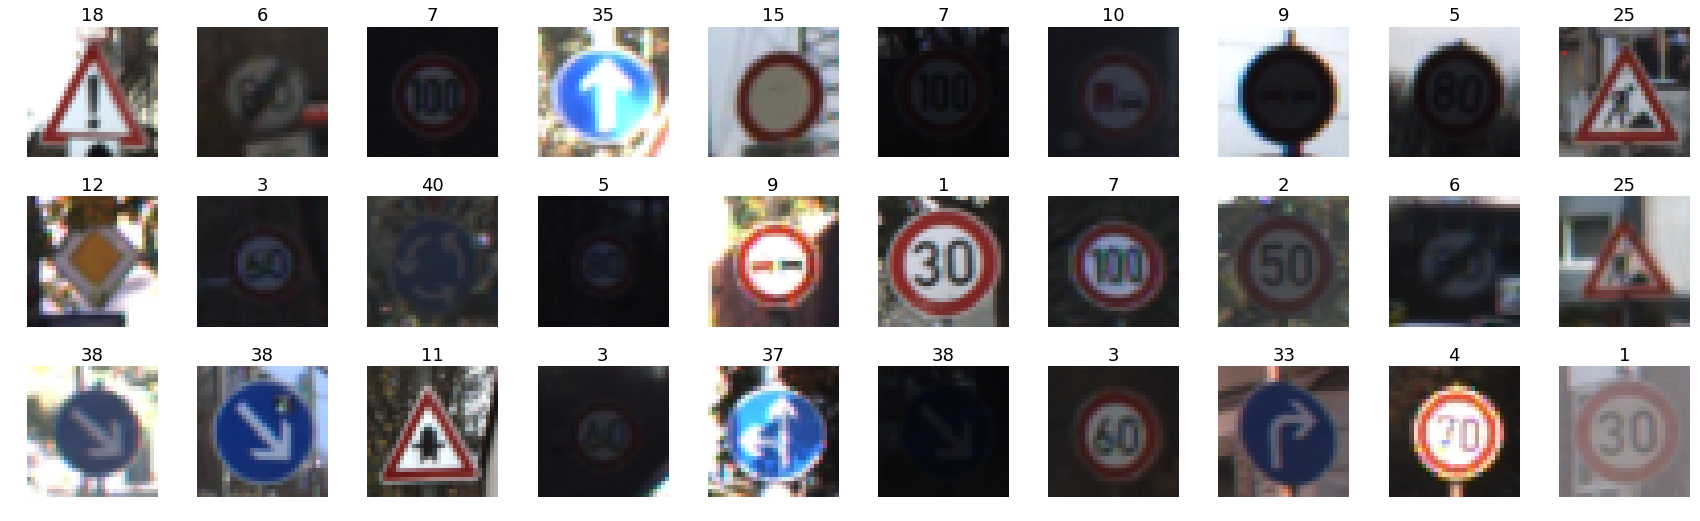

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Number of shown images
n_images = 30
n_images_per_row = 10

# Prepare figure
fig = plt.figure(figsize=(30,90))
fig.subplots_adjust(bottom=0.1, hspace=0.3)

# Show random images of the training set
for i in range(n_images):
    fig.add_subplot(n_images, n_images_per_row, i+1)
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.imshow(image)
    plt.title(y_train[index], fontsize=18)
    plt.axis('off')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Pre-processing for Grayscale Images

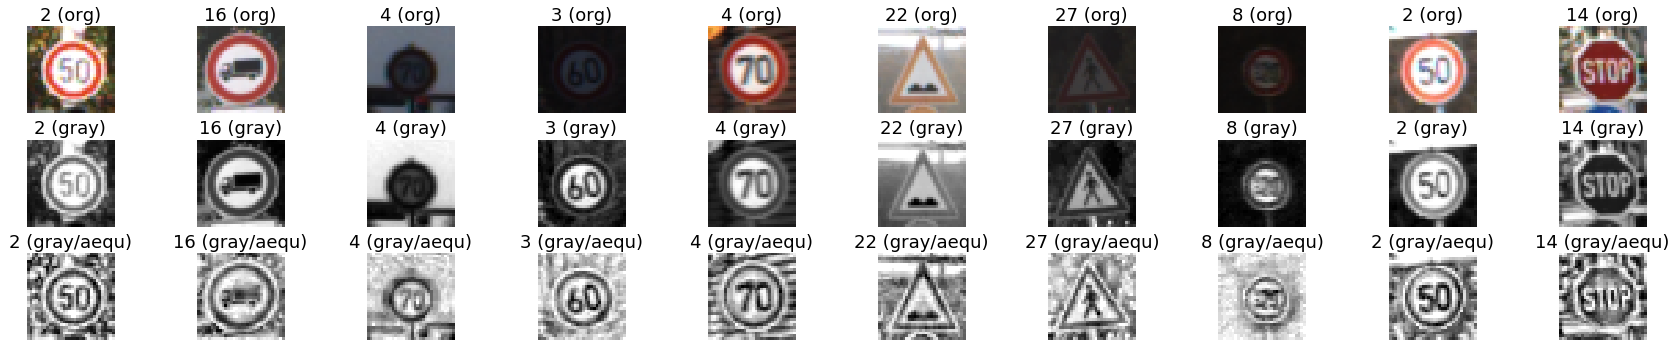

In [8]:
### Pre-Processing pipeline for RGB to grayscale images

def preprocess_image(image, normalize=True, debug=False):
    '''
    Coverts an RGB image to gray scale image and normalizes the 
    grayscale image to min/max value.
    
    'image' RGB image with format (width, height, 3). 3 = RGB channels.
    'normalize' If true the image is normalized to [-0.5, 0.5].
    
    Retruns the output image of the pipeline.
    '''
    
    # convert RGB to grayscale image
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image_clahe = clahe.apply(image_gray)
    
    # Normalizes the grayscale image from 0..255 to -0.5..0.5.
    if normalize == True:
        image_norm = (image_clahe - 128.) / 255.
    else:
        image_norm = image_clahe
    
    # Reshape image to w x h x 1 (add gray channel)
    shape = (image_norm.shape[0], image_norm.shape[1], 1)
    image_norm = np.resize(image_norm[:,:], shape)
    
    if debug:
        return (image_gray, image_clahe, image_norm)
    else:
        return image_norm
    
# Number of shown images
n_images = 10

# Prepare figure
fig = plt.figure(figsize=(30,60))
fig.subplots_adjust(bottom=0.1, hspace=0.3)

# Show random images of the training set
for i in range(n_images):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    image_gray, image_clahe, image_norm = preprocess_image(image.squeeze(), False, True)
    
    # show original RGB images
    fig.add_subplot(3*n_images, n_images, i+1)
    plt.imshow(image)
    title = str(y_train[index]) + ' (org)'
    plt.title(title, fontsize=18)
    plt.axis('off')

    # show pre-processed RGB image
    fig.add_subplot(3*n_images, n_images, n_images+i+1)
    plt.imshow(image_gray.squeeze(), cmap='gray')
    title = str(y_train[index]) + ' (gray)'
    plt.title(title, fontsize=18)
    plt.axis('off')

    # show pre-processed RGB image
    fig.add_subplot(3*n_images, n_images, 2*n_images+i+1)
    plt.imshow(image_norm.squeeze(), cmap='gray')
    title = str(y_train[index]) + ' (gray/aequ)'
    plt.title(title, fontsize=18)
    plt.axis('off')
    
plt.show()

In [9]:
### Normalize all training, validation and test data sets

# grayscale pre-processing
X_train_norm = np.zeros(shape=(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1), dtype=np.float32)
X_valid_norm = np.zeros(shape=(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1), dtype=np.float32)
X_test_norm = np.zeros(shape=(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1), dtype=np.float32)

for i in range(X_train.shape[0]):
    #X_train_norm[i] = X_train[i]
    X_train_norm[i] = preprocess_image(X_train[i])

print('Training set normalized', X_train_norm.shape)
    
for i in range(X_valid.shape[0]):
    #X_valid_norm[i] = X_valid[i]
    X_valid_norm[i] = preprocess_image(X_valid[i])

print('Validation set normalized', X_valid_norm.shape)

for i in range(X_test.shape[0]):
    #X_test_norm[i] = X_test[i]
    X_test_norm[i] = preprocess_image(X_test[i])

print('Test set normalized', X_test_norm.shape)

Training set normalized (34799, 32, 32, 1)
Validation set normalized (4410, 32, 32, 1)
Test set normalized (12630, 32, 32, 1)


### Model Architecture
#### Standard Le-Net-5 Neural Network Architecture

In [ ]:
### Le-Net-5 neural network architecture

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    '''
    Standard Le-Net-5 architecture. No modifications.
    '''
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1, name='conv1_act')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pool')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2, name='conv2_act')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pool')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W         = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b         = tf.Variable(tf.zeros(120), name='fc1_b')
    fc1           = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1, name='fc1_act')

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b = tf.Variable(tf.zeros(84), name='fc2_b')
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2, name='fc2_act')

    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name='fc3_w')
    fc3_b  = tf.Variable(tf.zeros(n_classes), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Le-Net-5 Neural Network Architecture with Dropout Regularization

In [ ]:
### Le-Net-5 neural network architecture with dropout units

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNetDropout(x, fc1_keep_prob, fc2_keep_prob):    
    '''
    Standard Le-Net-5 architecture with dropout units in the fully
    connected layers 3 and 4.
    
    `fc1_keep_prob`  Dropout keep probability for fully connected layer 1 (CNN layer 3).
    `fc2_keep_prob`  Dropout keep probability for fully connected layer 2 (CNN layer 4).
    '''
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1, name='conv1_act')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pool')

    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2, name='conv2_act')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pool')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120. (relu + dropout)
    fc1_W         = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b         = tf.Variable(tf.zeros(120), name='fc1_b')
    fc1           = tf.matmul(fc0, fc1_W) + fc1_b    
    fc1           = tf.nn.relu(fc1, name='fc1_act')
    fc1           = tf.nn.dropout(fc1, fc1_keep_prob, name='fc1_dropout')

    # Layer 4: Fully Connected. Input = 120. Output = 84. (relu + dropout)
    fc2_W         = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b         = tf.Variable(tf.zeros(84), name='fc2_b')
    fc2           = tf.matmul(fc1, fc2_W) + fc2_b
    fc2           = tf.nn.relu(fc2, name='fc2_act')
    fc2           = tf.nn.dropout(fc2, fc2_keep_prob, name='fc2_dropout')

    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(n_classes), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Deeper Le-Net-5 Neural Network Architecture with Dropout Regularization

In [10]:
### Le-Net-5 neural network architecture with dropout units and deeper

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNetDropoutDeep(x, fc1_keep_prob, fc2_keep_prob):    
    '''
    Standard Le-Net-5 architecture with dropout units in the fully
    connected layers 3 and 4.
    
    `fc1_keep_prob`  Dropout keep probability for fully connected layer 1 (CNN layer 3).
    `fc2_keep_prob`  Dropout keep probability for fully connected layer 2 (CNN layer 4).
    '''
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x15.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 15), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(15), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1, name='conv1_act')

    # Pooling. Input = 28x28x15. Output = 14x14x15.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pool')

    # Layer 2: Convolutional. Input = 14x14x15. Output = 10x10x30.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 15, 30), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(30), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2, name='conv2_act')

    # Pooling. Input = 10x10x30. Output = 5x5x30.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pool')

    # Flatten. Input = 5x5x30. Output = 750.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 750. Output = 150. (relu + dropout)
    fc1_W         = tf.Variable(tf.truncated_normal(shape=(750, 150), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b         = tf.Variable(tf.zeros(150), name='fc1_b')
    fc1           = tf.matmul(fc0, fc1_W) + fc1_b    
    fc1           = tf.nn.relu(fc1, name='fc1_act')
    fc1           = tf.nn.dropout(fc1, fc1_keep_prob, name='fc1_dropout')

    # Layer 4: Fully Connected. Input = 150. Output = 100. (relu + dropout)
    fc2_W         = tf.Variable(tf.truncated_normal(shape=(150, 100), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b         = tf.Variable(tf.zeros(100), name='fc2_b')
    fc2           = tf.matmul(fc1, fc2_W) + fc2_b
    fc2           = tf.nn.relu(fc2, name='fc2_act')
    fc2           = tf.nn.dropout(fc2, fc2_keep_prob, name='fc2_dropout')

    # Layer 5: Fully Connected. Input = 100. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(n_classes), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Hyperparameter
LEARNINGRATE            = 0.001
EPOCHS                  = 50          # number of epochs used in training
BATCH_SIZE              = 128         # batch size
DROPOUT_FC              = 0.5         # keep probability for dropout units in fully connected layers
MIN_REQ_DELTA_ACCURACY  = 0.0005      # min required delta accuracy to continue training
MIN_REQ_DELTA_LOSS      = -0.001      # min required delta loss to continue training
MAX_COUNT_STOP_TRAINING = 2           # max number of epochs without any accuracy or loss improvements

# x is a placeholder for a batch of input images. 
# y is a placeholder for a batch of output labels
# xx_keep_prop are placeholder of the dropout units
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
fc1_keep_prob = tf.placeholder(tf.float32)
fc2_keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

# Training pipeline
#logits = LeNet(x)            # Standard Le-Net-5
#logits = LeNetDropout(x, fc1_keep_prob, fc2_keep_prob)      # Le-Net-5 with dropout
logits = LeNetDropoutDeep(x, fc1_keep_prob, fc2_keep_prob)      # Deeper Le-Net-5 with dropout


cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = LEARNINGRATE)
training_operation = optimizer.minimize(loss_operation)

In [12]:
### Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})   # Standard LeNet5
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

def get_train_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})   # Standard LeNet5
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})
        total_loss += (loss * len(batch_x))
        
    return total_loss / num_examples

In [17]:
### Train the model

from sklearn.utils import shuffle

count_stop_training = 0
prev_validation_accuracy = 0.0
prev_validation_loss = 0.0
max_validation_accuracy = 0.0
epoch_model_saved = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    train_accuracy = np.zeros(EPOCHS)
    train_loss = np.zeros(EPOCHS)
    validation_accuracy = np.zeros(EPOCHS)
    validation_loss = np.zeros(EPOCHS)

    print("Training...")
    print()
 
    for i in range(EPOCHS):
        # shuffle the training data
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        
        print("EPOCH {}/{} ...".format(i+1, EPOCHS))

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})   # Standard LeNet5
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, fc1_keep_prob: DROPOUT_FC, fc2_keep_prob: DROPOUT_FC})
        
        # determine loss and accuracy
        train_loss[i] = get_train_loss(X_train_norm, y_train)
        validation_loss[i] = get_train_loss(X_valid_norm, y_valid)
        train_accuracy[i] = evaluate(X_train_norm, y_train)
        validation_accuracy[i] = evaluate(X_valid_norm, y_valid)
        delta_validation_accuracy = validation_accuracy[i] - prev_validation_accuracy
        delta_validation_loss = validation_loss[i] - prev_validation_loss
                
        print("Train Loss                = {:.4f}".format(train_loss[i]))
        print("Validation Loss           = {:.4f}".format(validation_loss[i]))
        print("Train Accuracy            = {:.4f}".format(train_accuracy[i]))
        print("Validation Accuracy       = {:.4f}".format(validation_accuracy[i]))
        print("Delta Validation Accuracy = {:.4f}".format(delta_validation_accuracy))
        print("Delta Validation Loss     = {:.4f}".format(delta_validation_loss))
        
        # check if validation accuracy and loss are improved (skip check for first epoch)
        if delta_validation_accuracy <= MIN_REQ_DELTA_ACCURACY and \
           delta_validation_loss >= MIN_REQ_DELTA_LOSS and \
           i > 0:
            count_stop_training += 1
            print('- No further validation accuracy and/or loss improvement (count={})'.format(count_stop_training))
        elif i > 0:
            count_stop_training = max(count_stop_training -1, 0)
            print('+ Validation accuracy and/or loss further improved (count={})'.format(count_stop_training))
            
            # safe the model for best validation accuracy
            if validation_accuracy[i] > max_validation_accuracy:
                max_validation_accuracy = validation_accuracy[i]
                epoch_model_saved = i
                saver.save(sess, './LeNet5_dropout_deep')
                print("+ Model saved, new max validation accuracy reached ({:.4f})".format(validation_accuracy[i]))

        print()

        # stop training if max stop count reached
        if count_stop_training >= MAX_COUNT_STOP_TRAINING:
            print('No further improvement detected. Stopped training.')
            print('Model saved in epoch {}'.format(i))
            break
            
        # store validation accuracy and loss for next epoch
        prev_validation_accuracy = validation_accuracy[i]
        prev_validation_loss = validation_loss[i]


    print('Test Loss:', np.array2string(train_loss, separator=', '))
    print('Validation Loss:', np.array2string(validation_loss, separator=', '))
    print('Test Accuracy:', np.array2string(train_accuracy, separator=', '))
    print('Validation Accuracy:', np.array2string(validation_accuracy, separator=', '))

Training...

EPOCH 1/50 ...
Train Loss                = 0.6600
Validation Loss           = 0.7503
Train Accuracy            = 0.8122
Validation Accuracy       = 0.7812
Delta Validation Accuracy = 0.7812
Delta Validation Loss     = 0.7503

EPOCH 2/50 ...
Train Loss                = 0.2874
Validation Loss           = 0.3758
Train Accuracy            = 0.9135
Validation Accuracy       = 0.8812
Delta Validation Accuracy = 0.1000
Delta Validation Loss     = -0.3745
+ Validation accuracy and/or loss further improved (count=0)
+ Model saved, new max validation accuracy reached (0.8812)

EPOCH 3/50 ...
Train Loss                = 0.1769
Validation Loss           = 0.2634
Train Accuracy            = 0.9453
Validation Accuracy       = 0.9084
Delta Validation Accuracy = 0.0272
Delta Validation Loss     = -0.1125
+ Validation accuracy and/or loss further improved (count=0)
+ Model saved, new max validation accuracy reached (0.9084)

EPOCH 4/50 ...
Train Loss                = 0.1188
Validation Loss

### Test and Validation Accuracies

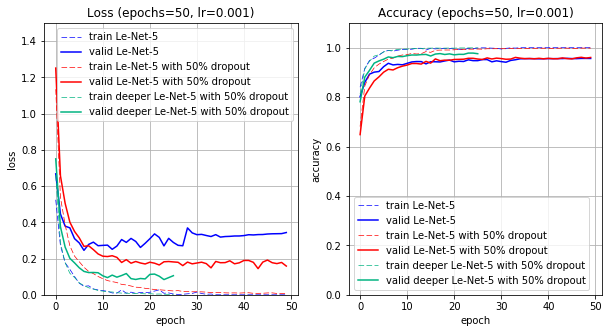

In [27]:
### Plot training and validation accuracies

fig = plt.figure(figsize=(10,5))

# Grayscale, adaptive histogram equalized and normalized (-0.5..0.5) images 
# Le-Net-5
# learning_rate = 0.001, epochs = 50, batch_size = 128
    
# Plot loss
plt.subplot(121)
y_values_train = [  5.24352401e-01,   2.72169376e-01,   1.76933081e-01,   1.40356642e-01,
   1.00840136e-01,   6.40646701e-02,   4.68118754e-02,   4.94583826e-02,
   3.24868742e-02,   2.67422529e-02,   2.28684795e-02,   1.97785130e-02,
   1.01349686e-02,   9.01186239e-03,   2.73630319e-02,   8.86563968e-03,
   1.47181263e-02,   7.77411404e-03,   1.28648227e-02,   1.12116792e-02,
   1.40807420e-02,   2.05831110e-02,   2.74739660e-02,   8.41925366e-03,
   1.04548796e-02,   4.38326233e-03,   2.10315504e-03,   2.96451178e-03,
   5.46779879e-03,   7.55066406e-03,   1.49520113e-02,   6.91775217e-03,
   2.88835123e-03,   4.47481849e-03,   2.81461524e-04,   7.22960735e-05,
   5.13756171e-05,   4.16337817e-05,   3.41528217e-05,   2.92549883e-05,
   2.54516065e-05,   2.22453765e-05,   1.96907335e-05,   1.74393901e-05,
   1.58552333e-05,   1.39808261e-05,   1.24402507e-05,   1.12884454e-05,
   9.90704867e-06,   8.86715742e-06]
y_values_valid = [ 0.66754816,  0.44601041,  0.37875524,  0.36954042,  0.30985975,
  0.28622746,  0.24531361,  0.27812702,  0.29059739,  0.27093281,
  0.27270831,  0.27415227,  0.25110447,  0.2689442 ,  0.30499568,
  0.28920998,  0.31114298,  0.29445632,  0.26131229,  0.28415485,
  0.30926161,  0.33617831,  0.31687967,  0.26992589,  0.3115786 ,
  0.2889685 ,  0.27304679,  0.27062007,  0.36930414,  0.34174394,
  0.33177399,  0.33344988,  0.32723369,  0.32160923,  0.33202151,
  0.31845685,  0.32153519,  0.32256252,  0.32453365,  0.32464662,
  0.32681531,  0.33161008,  0.33033191,  0.33231668,  0.3327178 ,
  0.33547998,  0.33669348,  0.33713311,  0.33765493,  0.34363973]
x_values = np.arange(0, len(y_values_valid), 1)
plt.plot(x_values, y_values_train, color=(0.0, 0.0, 1.0), linestyle='dashed', linewidth=0.7, label='train Le-Net-5')
plt.plot(x_values, y_values_valid, color=(0.0, 0.0, 1.0), linestyle='solid', linewidth=1.5, label='valid Le-Net-5')

plt.grid(True)
plt.title('Loss (epochs=50, lr=0.001)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim({0,1.5})
plt.legend()

# Plot accuracies
plt.subplot(122)
y_values_train = [ 0.84022529,  0.91654933,  0.94841806,  0.9576712 ,  0.96968304,
  0.98333285,  0.98916636,  0.98594787,  0.98997098,  0.99255726,
  0.99359177,  0.99393661,  0.99761487,  0.99772982,  0.9904595 ,
  0.99767235,  0.99499986,  0.99775856,  0.99591942,  0.99663783,
  0.99528722,  0.99373545,  0.99160895,  0.99727004,  0.99635047,
  0.99856318,  0.99954022,  0.99922412,  0.99821834,  0.99781603,
  0.99459755,  0.99749993,  0.99931033,  0.99839076,  0.99997126,
  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
  1.        ,  1.        ,  1.        ,  1.        ,  1.        ]
y_values_valid = [ 0.80113379,  0.85986395,  0.89297052,  0.90113379,  0.90362812,
  0.92312925,  0.93696145,  0.93038549,  0.9324263 ,  0.930839  ,
  0.93673469,  0.94240363,  0.94399093,  0.94376417,  0.93446712,
  0.94331066,  0.9430839 ,  0.94240363,  0.94648526,  0.94988662,
  0.94285714,  0.94512472,  0.94421769,  0.95102041,  0.94761905,
  0.94761905,  0.95192744,  0.95192744,  0.94285714,  0.94693878,
  0.94376417,  0.94126984,  0.94852608,  0.95124717,  0.95510204,
  0.95555556,  0.95578231,  0.95555556,  0.95510204,  0.9553288 ,
  0.95600907,  0.95555556,  0.95600907,  0.95600907,  0.9569161 ,
  0.95600907,  0.95578231,  0.95668934,  0.95668934,  0.95646258]
x_values = np.arange(0, len(y_values_valid), 1);
plt.plot(x_values, y_values_train, color=(0.0, 0.0, 1.0), linestyle='dashed', linewidth=0.7, label='train Le-Net-5')
plt.plot(x_values, y_values_valid, color=(0.0, 0.0, 1.0), linestyle='solid', linewidth=1.5, label='valid Le-Net-5')

plt.grid(True)
plt.title('Accuracy (epochs=50, lr=0.001)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim({0,1.1})
plt.legend()

# --------------------------------------------------------------------------

# Grayscale, adaptive histogram equalized and normalized (-0.5..0.5) images 
# Le-Net-5 with 50% dropout in fully connected layer 3 and 4
# learning_rate = 0.001, epochs = 50, batch_size = 128

# Plot loss
plt.subplot(121)
y_values_train = [ 1.13420133,  0.53853335,  0.38598293,  0.27040686,  0.21344048,
  0.18243944,  0.15213445,  0.12894199,  0.11690085,  0.10115262,
  0.0887223 ,  0.07843489,  0.07272449,  0.06760509,  0.05751328,
  0.05453211,  0.04850072,  0.04188325,  0.04078858,  0.0357926 ,
  0.03300481,  0.02881531,  0.02779041,  0.02557967,  0.02331266,
  0.02138818,  0.02308357,  0.01836667,  0.01811572,  0.01670328,
  0.01698781,  0.01617863,  0.01479901,  0.01229655,  0.0124504 ,
  0.01320963,  0.01075431,  0.01006672,  0.01056033,  0.00943716,
  0.01088701,  0.01130548,  0.0081592 ,  0.00799559,  0.00847258,
  0.01028805,  0.01057488,  0.00743363,  0.00723989,  0.00711727]
y_values_valid = [ 1.25130892,  0.65675506,  0.50462665,  0.40098768,  0.34957184,
  0.31429608,  0.26739133,  0.27052744,  0.24925267,  0.22547172,
  0.21306587,  0.21109789,  0.21562772,  0.20645846,  0.17835266,
  0.19397315,  0.17441727,  0.18386081,  0.17556305,  0.1701383 ,
  0.17978357,  0.17439567,  0.16466852,  0.18225982,  0.1837706 ,
  0.18139959,  0.17943003,  0.16108814,  0.18049878,  0.17088538,
  0.17544128,  0.1799461 ,  0.1720451 ,  0.14869523,  0.18402194,
  0.17705785,  0.17762954,  0.18759635,  0.17110985,  0.1765087 ,
  0.1895379 ,  0.18956917,  0.17907767,  0.14444017,  0.18041312,
  0.19182372,  0.17711481,  0.17215789,  0.17849892,  0.15855254]
x_values = np.arange(0, len(y_values_valid), 1);
plt.plot(x_values, y_values_train, color=(1.0, 0.0, 0.0), linestyle='dashed', linewidth=0.7, label='train Le-Net-5 with 50% dropout')
plt.plot(x_values, y_values_valid, color=(1.0, 0.0, 0.0), linestyle='solid', linewidth=1.5, label='valid Le-Net-5 with 50% dropout')
plt.legend()

# Plot accuracies
plt.subplot(122)
y_values_train = [ 0.68096784,  0.84528291,  0.89062904,  0.91856088,  0.93356131,
  0.94422254,  0.95382051,  0.95790109,  0.96611972,  0.97054513,
  0.97201069,  0.97669473,  0.97456823,  0.97586138,  0.9843961 ,
  0.98126383,  0.98953993,  0.99034455,  0.99071812,  0.99068939,
  0.99152274,  0.99341935,  0.99318946,  0.99408029,  0.99410903,
  0.99456881,  0.99396534,  0.99583321,  0.99580448,  0.99594816,
  0.99612058,  0.995747  ,  0.99695394,  0.99672404,  0.99683899,
  0.99686773,  0.99718383,  0.99767235,  0.9975574 ,  0.99798845,
  0.99727004,  0.99681025,  0.99784477,  0.99816087,  0.99816087,
  0.99718383,  0.99689646,  0.99833329,  0.99827581,  0.99833329]
y_values_valid = [ 0.64829932,  0.80453515,  0.83650794,  0.86553288,  0.88185941,
  0.90090703,  0.91269841,  0.90997732,  0.91904762,  0.92539683,
  0.92970522,  0.93605442,  0.93605442,  0.93378685,  0.9446712 ,
  0.93764172,  0.95464853,  0.94739229,  0.94965986,  0.94920635,
  0.95238095,  0.95283447,  0.95351474,  0.95714286,  0.95714286,
  0.95419501,  0.95238095,  0.95873016,  0.95442177,  0.95782313,
  0.95600907,  0.95328798,  0.95396825,  0.96077098,  0.95782313,
  0.95578231,  0.95646259,  0.95510204,  0.95714286,  0.95510204,
  0.9569161 ,  0.95555556,  0.9553288 ,  0.95873016,  0.95578231,
  0.95464853,  0.95895692,  0.96122449,  0.95804989,  0.96054422]
x_values = np.arange(0, len(y_values_valid), 1);
plt.plot(x_values, y_values_train, color=(1.0, 0.0, 0.0), linestyle='dashed', linewidth=0.7, label='train Le-Net-5 with 50% dropout')
plt.plot(x_values, y_values_valid, color=(1.0, 0.0, 0.0), linestyle='solid', linewidth=1.5, label='valid Le-Net-5 with 50% dropout')
plt.legend()

# --------------------------------------------------------------------------

# Grayscale, adaptive histogram equalized and normalized (-0.5..0.5) images 
# Deeper Le-Net-5 with 50% dropout in fully connected layer 3 and 4
# learning_rate = 0.001, epochs = 50, batch_size = 128

# Plot loss
plt.subplot(121)
y_values_train = [ 0.65996083,  0.2874361 ,  0.1769347 ,  0.11883369,  0.09543717,
  0.06604562,  0.05088429,  0.03882002,  0.03125782,  0.02388732,
  0.02034116,  0.01641942,  0.01548686,  0.01176089,  0.00918506,
  0.00935807,  0.00682831,  0.00770184,  0.00728184,  0.00514587,
  0.00664068,  0.00358086,  0.00440515,  0.00292399,  0.00268287,
  0.00246203]
y_values_valid = [ 0.75034842,  0.375817  ,  0.26335693,  0.20129071,  0.17617493,
  0.14907998,  0.12911748,  0.12263413,  0.12323234,  0.12179652,
  0.10486815,  0.09486771,  0.10864779,  0.09726902,  0.10640538,
  0.11736957,  0.08930231,  0.08463469,  0.09003126,  0.0876468 ,
  0.11257002,  0.11436522,  0.10252491,  0.08391688,  0.09479883,
  0.10554848]
x_values = np.arange(0, len(y_values_valid), 1);
plt.plot(x_values, y_values_train, color=(0.0, 0.7, 0.5), linestyle='dashed', linewidth=0.7, label='train deeper Le-Net-5 with 50% dropout')
plt.plot(x_values, y_values_valid, color=(0.0, 0.7, 0.5), linestyle='solid', linewidth=1.5, label='valid deeper Le-Net-5 with 50% dropout')
plt.legend()

# Plot accuracies
plt.subplot(122)
y_values_train = [ 0.81220725,  0.91347453,  0.94525705,  0.96606224,  0.97120607,
  0.9828156 ,  0.98836173,  0.98976982,  0.9932182 ,  0.99456881,
  0.99471249,  0.99603437,  0.99626426,  0.99701141,  0.99798845,
  0.99824708,  0.99876433,  0.99813213,  0.99830455,  0.99859191,
  0.99824708,  0.9990517 ,  0.99902296,  0.99939653,  0.99939653,
  0.99939653]
y_values_valid = [ 0.78117914,  0.88117914,  0.90839002,  0.93764172,  0.94648526,
  0.95351474,  0.96258503,  0.95963719,  0.96462585,  0.96394558,
  0.96780045,  0.97052154,  0.97029478,  0.97210884,  0.97278912,
  0.96643991,  0.97437642,  0.97619048,  0.97256236,  0.97505669,
  0.97120181,  0.97324263,  0.97301587,  0.97823129,  0.97823129,
  0.97573696]
x_values = np.arange(0, len(y_values_valid), 1);
plt.plot(x_values, y_values_train, color=(0.0, 0.7, 0.5), linestyle='dashed', linewidth=0.7, label='train deeper Le-Net-5 with 50% dropout')
plt.plot(x_values, y_values_valid, color=(0.0, 0.7, 0.5), linestyle='solid', linewidth=1.5, label='valid deeper Le-Net-5 with 50% dropout')
plt.legend()

plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Loaded image: ./traffic_signs_new/electronic_speed_limit_60.jpg with dimensions: (22, 24, 3)
Loaded image: ./traffic_signs_new/speed_limit_30_zone.jpg with dimensions: (39, 43, 3)
Loaded image: ./traffic_signs_new/speed_limit_60.jpg with dimensions: (25, 28, 3)
Loaded image: ./traffic_signs_new/turn_right.jpg with dimensions: (45, 36, 3)
Loaded image: ./traffic_signs_new/yield.jpg with dimensions: (188, 193, 3)


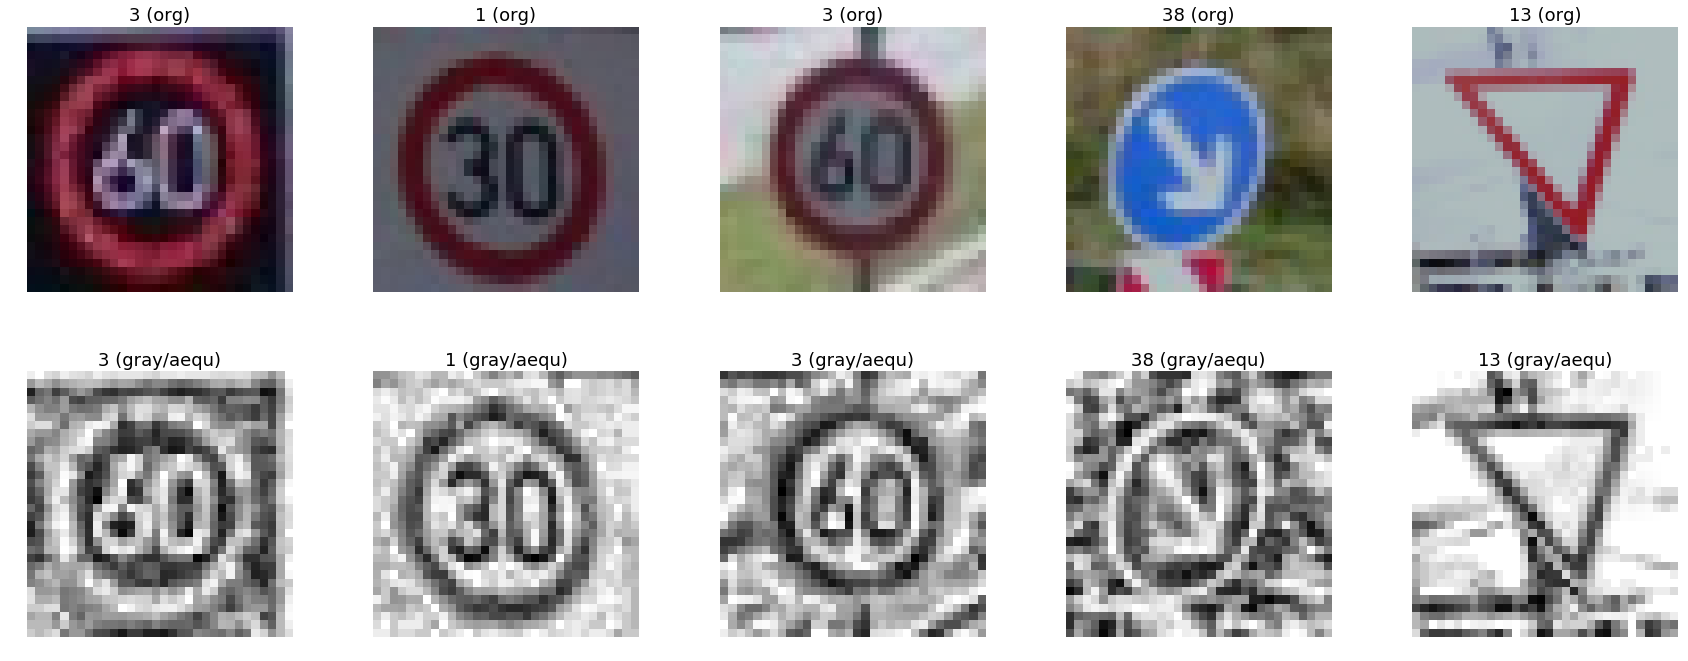

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

# Get image list
dir_test_images = "./traffic_signs_new/"
image_file_list = os.listdir(dir_test_images)

# Prepare test X and y
n_images = 5
X_test_new = np.zeros(shape=(n_images, 32, 32, 1), dtype=np.float32)
y_test_new = np.array([3, 1, 3, 38, 13])

# Prepare figure
fig = plt.figure(figsize=(30,60))
fig.subplots_adjust(bottom=0.1, hspace=0.3)
index = 0

# load, pre-process and show new traffic sign images
for i in range(0, len(image_file_list), 1):
    if(image_file_list[i].endswith('jpg')):
        image = mpimg.imread(dir_test_images + image_file_list[i])
        print('Loaded image:', dir_test_images + image_file_list[i], 'with dimensions:', image.shape)
        
        image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
        X_test_new[index] = preprocess_image(image)

        # show original RGB images
        fig.add_subplot(2*n_images, n_images, index+1)
        plt.imshow(image)
        title = str(y_test_new[index]) + ' (org)'
        plt.title(title, fontsize=18)
        plt.axis('off')

        # show pre-processed RGB image
        fig.add_subplot(2*n_images, n_images, n_images+index+1)
        plt.imshow(X_test_new[index].squeeze(), cmap='gray')
        title = str(y_test_new[index]) + ' (gray/aequ)'
        plt.title(title, fontsize=18)
        plt.axis('off')
        
        index += 1
        
plt.show()

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

n_images = len(X_test_new)
y_prediction = np.zeros(n_images)
#checkpoint_LeNet5_dropout = './LeNet5'
#checkpoint_LeNet5_dropout = './LeNet5_dropout'
checkpoint_LeNet5_dropout = './LeNet5_dropout_deep'

# Predict traffic signs with Le-Net-5 with 50% dropout
with tf.Session() as sess:
    print('Deeper Le-Net-5 with 50% dropout')
    saver = tf.train.import_meta_graph(checkpoint_LeNet5_dropout + '.meta')
    saver.restore(sess, checkpoint_LeNet5_dropout)
    
    # get test accuracy on new images
    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    
    # predict new signs
    predicted_logits = sess.run(logits, feed_dict={x: X_test_new, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})

    softmax = tf.nn.softmax(predicted_logits)
    softmax = sess.run(softmax, feed_dict={logits: predicted_logits})
    
    y_prediction = np.argmax(softmax, axis=1)
        
    print(' Image  | Label                   | Prediction               | Probability')
    print('--------+-------------------------+--------------------------+-------------')
    for i in range(n_images):
        print("Image {} | {:2}-{:<20} | {:2}-{:21} | {:8.2f}%".format(i, y_test_new[i], 
                                                            signnames[y_test_new[i]], 
                                                            y_prediction[i], 
                                                            signnames[y_prediction[i]], 
                                                            np.max(softmax[i]*100.)))

Deeper Le-Net-5 with 50% dropout
Test Accuracy = 0.800

 Image  | Label                   | Prediction               | Probability
--------+-------------------------+--------------------------+-------------
Image 0 |  3-Speed limit (60km/h) | 14-Stop                  |    99.82%
Image 1 |  1-Speed limit (30km/h) |  1-Speed limit (30km/h)  |   100.00%
Image 2 |  3-Speed limit (60km/h) |  3-Speed limit (60km/h)  |   100.00%
Image 3 | 38-Keep right           | 38-Keep right            |    99.84%
Image 4 | 13-Yield                | 13-Yield                 |   100.00%


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(checkpoint_LeNet5_dropout + '.meta')
    saver.restore(sess, checkpoint_LeNet5_dropout)

    train_accuracy = evaluate(X_train_norm, y_train)
    print("Train Accuracy Le-Net-5 with 50% dropout = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid_norm, y_valid)
    print("Valid Accuracy Le-Net-5 with 50% dropout = {:.3f}".format(valid_accuracy))
    
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy Le-Net-5 with 50% dropout = {:.3f}".format(test_accuracy))

Train Accuracy Le-Net-5 with 50% dropout = 0.999
Valid Accuracy Le-Net-5 with 50% dropout = 0.978
Test Accuracy Le-Net-5 with 50% dropout = 0.961


#### Precision
precision = TP / (TP + FP)

The precision is also known as PPV (positive predictive value).
What proportion of the instances classified as X is actually an X?

#### Recall
recall = TP / (TP + FN)

The recall is also known as TPR (true positive rate).
What proportion of the real X was actually classified as X?

#### F-Score
f-score = 2 * precision * recall / (precision + recall)

In [21]:
### Calculate precision, recall and f-score

import sklearn.metrics as skm

n_images = len(X_test)
y_prediction = np.zeros(n_images)
checkpoint_LeNet5_dropout = './LeNet5_dropout_deep'

# Predict traffic signs with Le-Net-5 with 50% dropout
with tf.Session() as sess:
    print('Le-Net-5 with 50% dropout')
    print()
    saver = tf.train.import_meta_graph(checkpoint_LeNet5_dropout + '.meta')
    saver.restore(sess, checkpoint_LeNet5_dropout)
        
    # predict test signs
    predicted_logits = sess.run(logits, feed_dict={x: X_test_norm, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})
    y_prediction = np.argmax(predicted_logits, axis=1)
    
    # calcuate KPIs (key performance indicators)
    precision, recall, fscore, support = skm.precision_recall_fscore_support(y_test, y_prediction)
    confusion_matrix = skm.confusion_matrix(y_test, y_prediction)

    print('ID | Signname                                           | Precision | Recall   | F-Score | Support')
    print('---+----------------------------------------------------+-----------+----------+---------+---------')

    for i in range(len(precision)):
        print('{:2} | {:<50} |{:8.2f} % | {:6.2f} % | {:7.2f} | {}'.format(i, signnames[i] ,precision[i]*100., recall[i] * 100., fscore[i], support[i]))

    print()
    print('Precision: {:.3f} %'.format(skm.precision_score(y_test, y_prediction, average='macro')*100))
    print('Recall:    {:.3f} %'.format(skm.recall_score(y_test, y_prediction, average='macro')*100))
    print('f1-score:  {:.3f}'.format(skm.f1_score(y_test, y_prediction, average='macro')))

Le-Net-5 with 50% dropout

ID | Signname                                           | Precision | Recall   | F-Score | Support
---+----------------------------------------------------+-----------+----------+---------+---------
 0 | Speed limit (20km/h)                               |   98.36 % | 100.00 % |    0.99 | 60
 1 | Speed limit (30km/h)                               |   98.88 % |  97.78 % |    0.98 | 720
 2 | Speed limit (50km/h)                               |   96.62 % |  99.20 % |    0.98 | 750
 3 | Speed limit (60km/h)                               |   97.43 % |  92.67 % |    0.95 | 450
 4 | Speed limit (70km/h)                               |   99.54 % |  98.33 % |    0.99 | 660
 5 | Speed limit (80km/h)                               |   89.31 % |  96.83 % |    0.93 | 630
 6 | End of speed limit (80km/h)                        |   96.67 % |  96.67 % |    0.97 | 150
 7 | Speed limit (100km/h)                              |   95.18 % |  96.44 % |    0.96 | 450
 8 | Speed limi

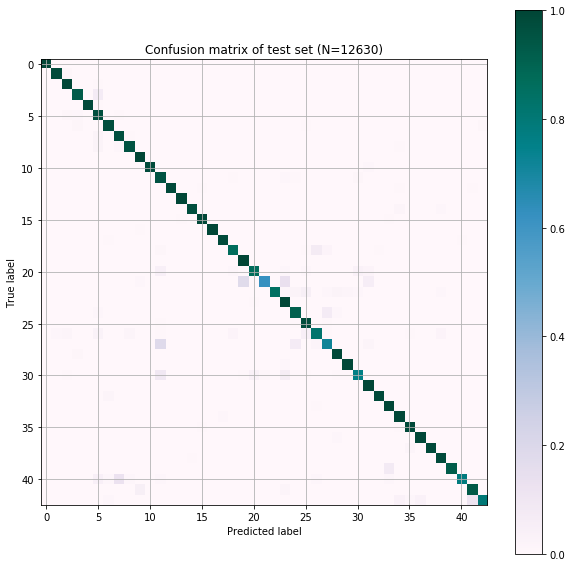

In [22]:
# Plot normalized confusion matrix
confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

fig = plt.figure(figsize=(10,10))

plt.imshow(confusion_matrix_norm, cmap=plt.cm.PuBuGn)
plt.colorbar()   
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of test set (N={})'.format(n_images))
plt.grid()
plt.show()

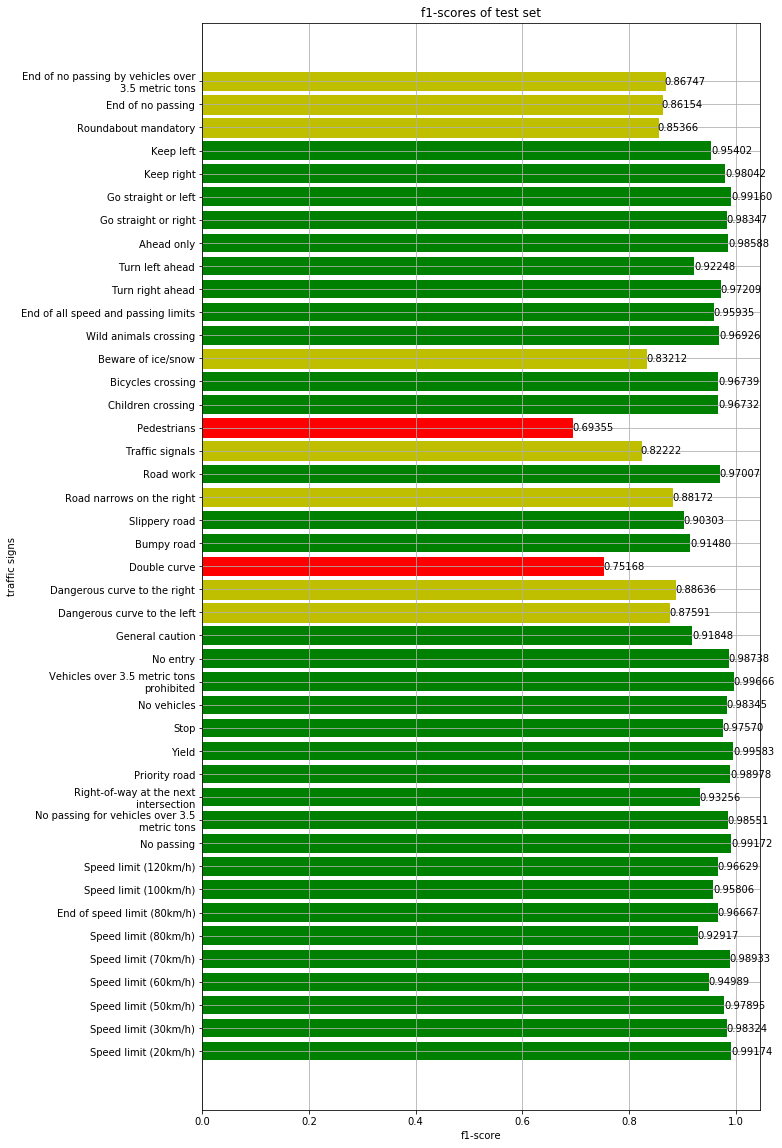

In [23]:
# f1-scores in a horizontal bar chart

from textwrap import wrap
    
def autolabel(rects, values):
    for index, val in enumerate(values):
        ax.text(val, index, '%.5f' % val, ha='left', va='center')

# Plot probability bar charts for each traffic sign classification
width = 0.8           # bar width
index = np.arange(len(fscore))

labels = np.array(signnames)
labels = ['\n'.join(wrap(l, 35)) for l in labels]

fig = plt.figure(figsize=(10,20))
ax = plt.subplot()
rects = ax.barh(index, fscore, width, color='g')

for i, rect in enumerate(rects):
    if fscore[i] <= 0.8:
        rect.set_color('r')
    elif fscore[i] <= 0.9:
        rect.set_color('y')

ax.set_yticks(index)
ax.set_yticklabels(labels)
plt.title('f1-scores of test set')
plt.ylabel('traffic signs')
plt.xlabel('f1-score')
plt.grid()
autolabel(rects, fscore)
plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = 5

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(checkpoint_LeNet5_dropout + '.meta')
    saver.restore(sess, checkpoint_LeNet5_dropout)
    
    #predicted_logits = sess.run(logits, feed_dict={x: X_test_new})   # Standard Le-Net-5
    predicted_logits = sess.run(logits, feed_dict={x: X_test_new, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})
    softmax = sess.run(tf.nn.softmax(predicted_logits))

    values, indices = sess.run(tf.nn.top_k(tf.constant(softmax), k=top_k))
    
    print('softmax values:', values)
    print('indices:', indices)

softmax values: [[  9.98157322e-01   1.39201968e-03   2.91208824e-04   7.96591557e-05
    1.98025009e-05]
 [  9.99998927e-01   5.49387835e-07   2.43227845e-07   9.26769275e-08
    6.84001051e-08]
 [  9.99999404e-01   6.27455563e-07   3.27325298e-12   1.89245624e-12
    3.07906072e-13]
 [  9.98366892e-01   1.63269194e-03   4.66005247e-07   6.14148288e-10
    5.88464999e-10]
 [  1.00000000e+00   3.09600368e-14   1.38684334e-15   6.66858028e-16
    2.48933677e-18]]
indices: [[14 34  2  3  1]
 [ 1  2  5  0  4]
 [ 3  5 16  2 34]
 [38 34 14 23 40]
 [13 39 10 12 38]]


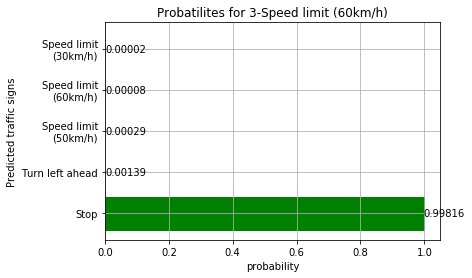

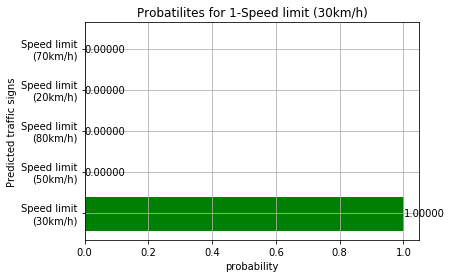

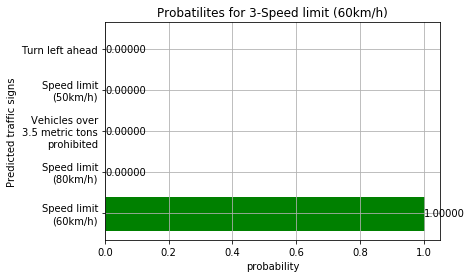

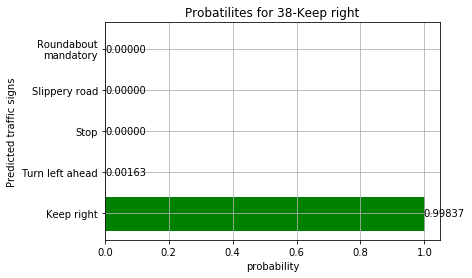

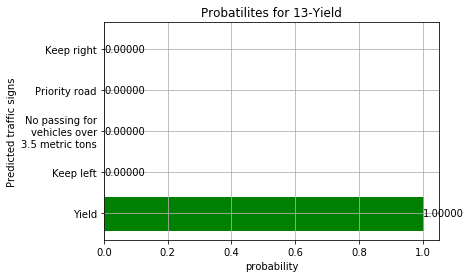

In [25]:
from textwrap import wrap
    
def autolabel(rects, values):
    for index, val in enumerate(values):
        ax.text(val, index, '%.5f' % val, ha='left', va='center')
        
# Plot probability bar charts for each traffic sign classification
width = 0.8           # bar width
index = np.arange(top_k)

for i in range(len(values)):
    labels = np.array(signnames)[np.array(indices[i])]
    labels = ['\n'.join(wrap(l, 15)) for l in labels]

    fig = plt.figure()
    ax = plt.subplot()
    rects = ax.barh(index, values[i], width, color='r')
    rects[0].set_color('g')
    ax.set_yticks(index)
    ax.set_yticklabels(labels)
    plt.title('Probatilites for {}-{}'.format(y_test_new[i], signnames[y_test_new[i]]))
    plt.ylabel('Predicted traffic signs')
    plt.xlabel('probability')
    plt.grid()
    autolabel(rects, values[i])
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Layer 1 activations (conv1) for 38-Keep right sign


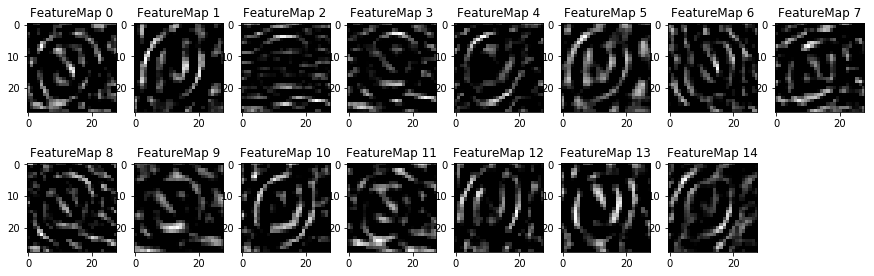

Layer 1 pooling (conv1_pool) for 38-Keep right sign


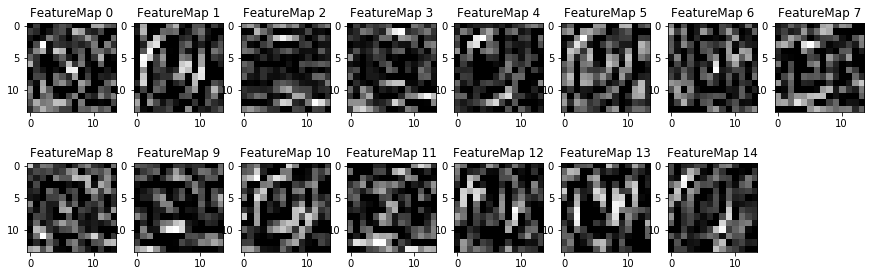

Layer 2 activations (conv2) for 38-Keep right sign


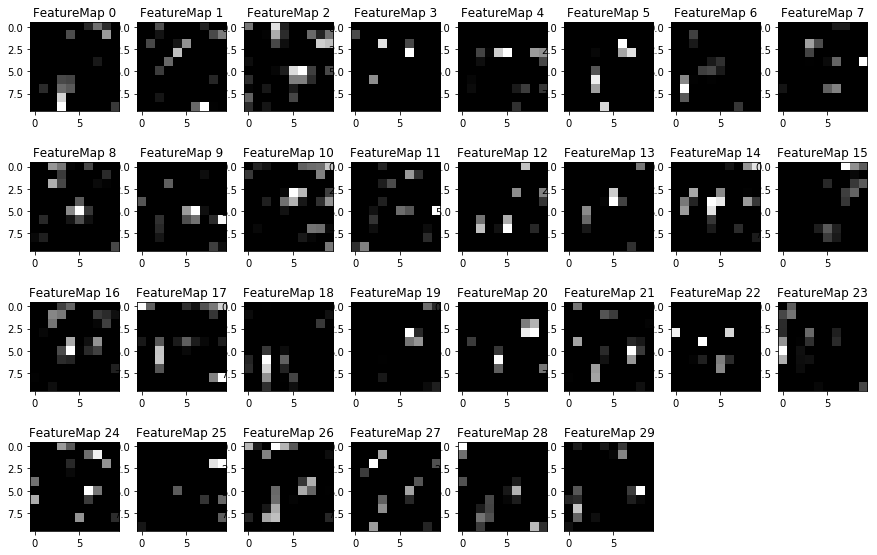

Layer 2 pooling (conv2_pool) for 38-Keep right sign


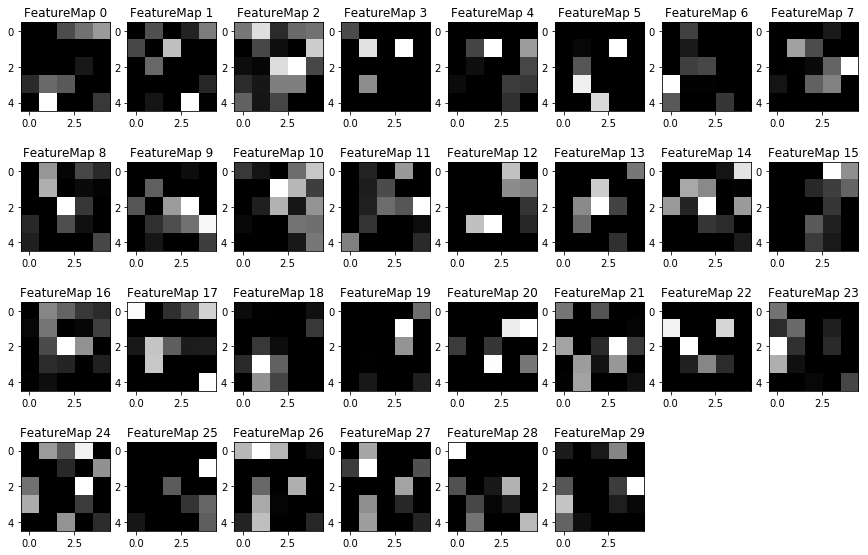

In [26]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x: image_input, fc1_keep_prob: 1.0, fc2_keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

# plot all trained variables
#names = tf.trainable_variables()
#for n in names:
#    print(n)

# plot feature maps
sign_index = 3      # index = 0...4

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(checkpoint_LeNet5_dropout + '.meta')
    saver.restore(sess, checkpoint_LeNet5_dropout)

    # Layer 1 activation (Output = 28x28x6)
    print('Layer 1 activations (conv1) for {}-{} sign'.format(y_test_new[sign_index], signnames[y_test_new[sign_index]]))
    activation = tf.get_default_graph().get_tensor_by_name("conv1_act:0")
    outputFeatureMap(np.asarray([X_test_new[sign_index]]), activation)

    # Layer 1 pooling (Output = 14x14x6)
    print('Layer 1 pooling (conv1_pool) for {}-{} sign'.format(y_test_new[sign_index], signnames[y_test_new[sign_index]]))
    activation = tf.get_default_graph().get_tensor_by_name("conv1_pool:0")
    outputFeatureMap(np.asarray([X_test_new[sign_index]]), activation)
    
    # Layer 2 activation (Output = 10x10x16)
    print('Layer 2 activations (conv2) for {}-{} sign'.format(y_test_new[sign_index], signnames[y_test_new[sign_index]]))
    activation = tf.get_default_graph().get_tensor_by_name("conv2_act:0")
    outputFeatureMap(np.asarray([X_test_norm[sign_index]]), activation)
    
    # Layer 2 pooling (Output = 5x5x16)
    print('Layer 2 pooling (conv2_pool) for {}-{} sign'.format(y_test_new[sign_index], signnames[y_test_new[sign_index]]))
    activation = tf.get_default_graph().get_tensor_by_name("conv2_pool:0")
    outputFeatureMap(np.asarray([X_test_norm[sign_index]]), activation)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

The following list describes the features maps of the layer 1 activation relu.

- Feature Map 0 = looks for round shapes and the arrow head
- Feature Map 1 = look for round shapes with an right arrow
- Feature Map 3 and 5 = looks for round shapes with more "clutter/noise" in the background

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 